# Workshop # 4

In [56]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [59]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [60]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [61]:
df2['Survived'] = df2['Survived'].astype('category')

In [62]:
df2['Pclass'] = df2['Pclass'].astype('category')
df2['SibSp'] = df2['SibSp'].astype('category')
df2['Parch'] = df2['Parch'].astype('category')

In [63]:
df2.dtypes

Survived    category
Pclass      category
Sex           object
Age          float64
SibSp       category
Parch       category
dtype: object

In [64]:
print(df2)

    Survived Pclass     Sex        Age SibSp Parch
0          0      3    male  22.000000     1     0
1          1      1  female  38.000000     1     0
2          1      3  female  26.000000     0     0
3          1      1  female  35.000000     1     0
4          0      3    male  35.000000     0     0
..       ...    ...     ...        ...   ...   ...
886        0      2    male  27.000000     0     0
887        1      1  female  19.000000     0     0
888        0      3  female  29.699118     1     2
889        1      1    male  26.000000     0     0
890        0      3    male  32.000000     0     0

[891 rows x 6 columns]


In [65]:
df2.isnull().any().any()

False

In [66]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["male", "female"])
list(le.classes_)
df2['Sex'] = le.transform(df2['Sex'])

In [67]:
df2['Sex'] = df2['Sex'].astype('category')

In [68]:
df2.groupby(['Survived']).count()

,Pclass,Sex,Age,SibSp,Parch
Survived,,,,,
0,549,549,549,549,549
1,342,342,342,342,342


In [69]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df2[['Pclass','Sex','Age','SibSp','Parch']], 
                                                    df2['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")

Labels for training and testing data


In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
train_y.dtype


CategoricalDtype(categories=[0, 1], ordered=False)

In [72]:
train_X['Sex']

416    0
801    0
512    1
455    1
757    1
      ..
98     0
322    0
382    1
365    1
510    1
Name: Sex, Length: 623, dtype: category
Categories (2, int64): [0, 1]

In [73]:
print(train_X.dtypes)
print(train_y.dtypes)
print(test_X.dtypes)
print(test_y.dtypes)

Pclass    category
Sex       category
Age        float64
SibSp     category
Parch     category
dtype: object
category
Pclass    category
Sex       category
Age        float64
SibSp     category
Parch     category
dtype: object
category


<Axes: xlabel='Survived'>

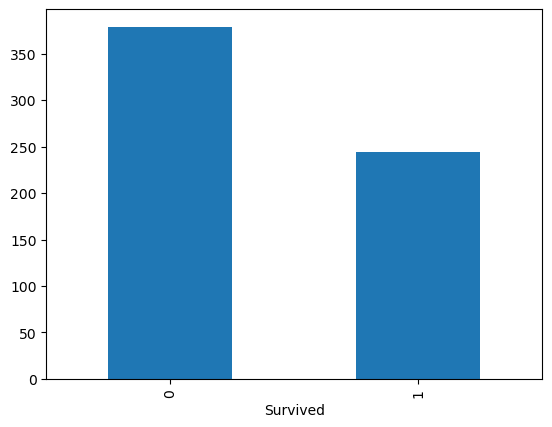

In [74]:
train_y.value_counts().plot(kind='bar')

<Axes: xlabel='Survived'>

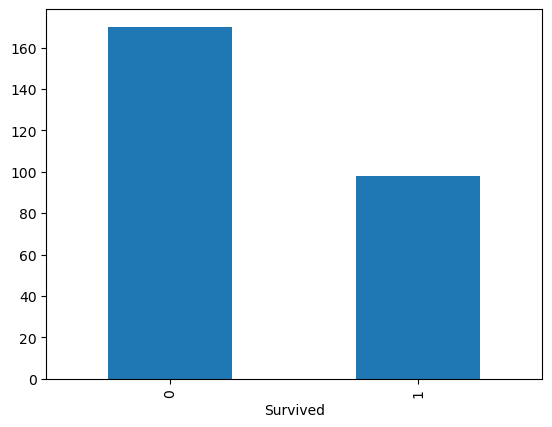

In [75]:
test_y.value_counts().plot(kind='bar')

In [76]:
from sklearn.naive_bayes import CategoricalNB , GaussianNB, BernoulliNB, MultinomialNB


model = GaussianNB()

model.fit(train_X, train_y);


In [77]:
from sklearn.metrics import accuracy_score

print("Predicting iris on the test set")

y_pred = model.predict(test_X)

print("Accurary : ", round(accuracy_score(test_y, y_pred),4))
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting iris on the test set
Accurary :  0.7724
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       170
           1       0.66      0.80      0.72        98

    accuracy                           0.77       268
   macro avg       0.76      0.78      0.76       268
weighted avg       0.79      0.77      0.78       268

[[129  41]
 [ 20  78]]


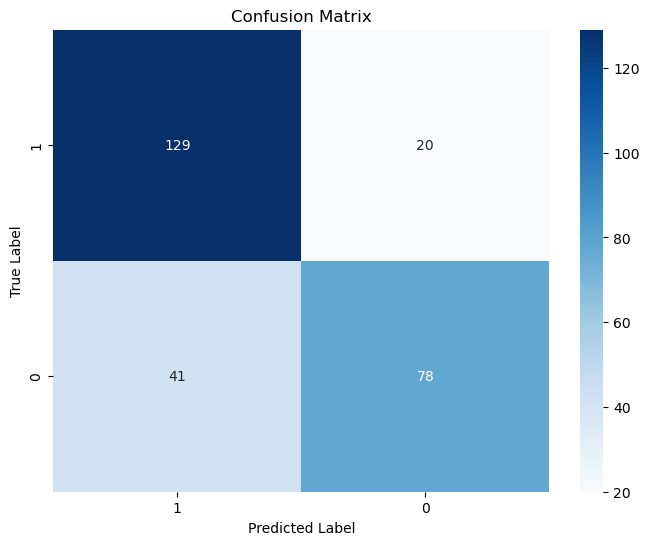

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_pred, test_y), annot=True, fmt='d', cmap='Blues', xticklabels=test_y.unique(), yticklabels=test_y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Handle Imbalanced Data

### 1. Up-sample Minority Class

In [82]:
from sklearn.utils import resample

# Separate majority and minority classes
df2_majority = df2[df2.Survived==0]
df2_minority = df2[df2.Survived==1]
 
# Upsample minority class
df2_minority_upsampled = resample(df2_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=549,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df2_upsampled = pd.concat([df2_majority, df2_minority_upsampled])
 
# Display new class counts
df2_upsampled.Survived.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

### Resplit

In [83]:

train_X2, test_X2, train_y2, test_y2 = train_test_split(df2_upsampled[['Pclass','Sex','Age','SibSp','Parch']], 
                                                    df2_upsampled['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123,
                                                    stratify=df2_upsampled['Survived'])
print("Labels for training and testing data")

Labels for training and testing data


<Axes: xlabel='Survived'>

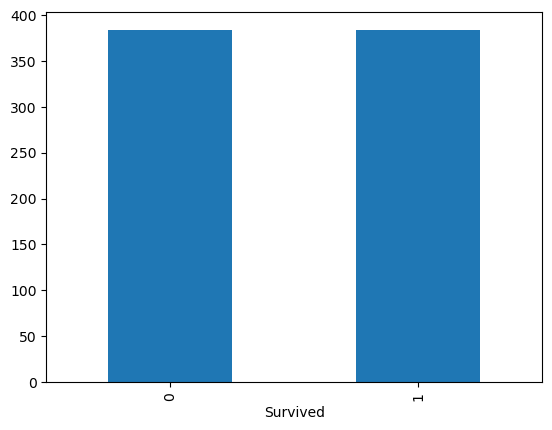

In [84]:
train_y2.value_counts().plot(kind='bar')

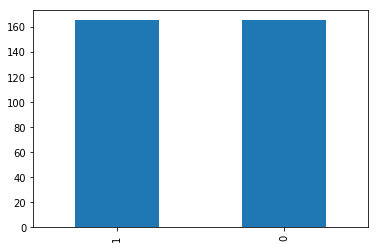

In [234]:
test_y2.value_counts().plot(kind='bar')

In [85]:
model2 = GaussianNB()

model2.fit(train_X2, train_y2);

In [86]:
print("Predicting iris on the test set")

y_pred2 = model2.predict(test_X2)

print("Accurary : ", round(accuracy_score(test_y2, y_pred2),4))
print(classification_report(test_y2, y_pred2))
print(confusion_matrix(test_y2, y_pred2))

Predicting iris on the test set
Accurary :  0.7455
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       165
           1       0.73      0.78      0.75       165

    accuracy                           0.75       330
   macro avg       0.75      0.75      0.75       330
weighted avg       0.75      0.75      0.75       330

[[118  47]
 [ 37 128]]


### Down-sample Majority Class

In [87]:
# Separate majority and minority classes
df3_majority = df2[df2.Survived==0]
df3_minority = df2[df2.Survived==1]
 
# Downsample majority class
df3_majority_downsampled = resample(df3_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=342,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df3_downsampled = pd.concat([df3_majority_downsampled, df3_minority])
 
# Display new class counts
df3_downsampled.Survived.value_counts()

Survived
0    342
1    342
Name: count, dtype: int64

In [88]:

train_X3, test_X3, train_y3, test_y3 = train_test_split(df3_downsampled[['Pclass','Sex','Age','SibSp','Parch']], 
                                                    df3_downsampled['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123,
                                                    stratify=df3_downsampled['Survived'])
print("Labels for training and testing data")

Labels for training and testing data


<Axes: xlabel='Survived'>

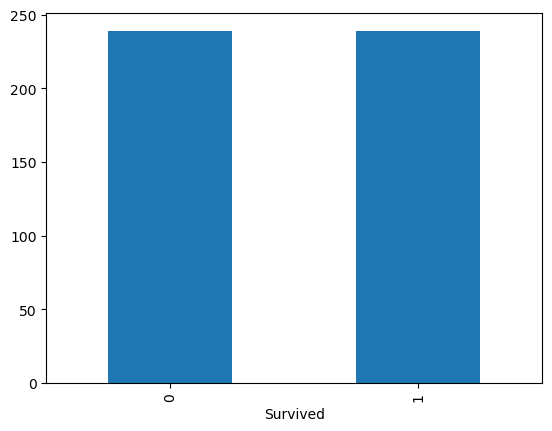

In [89]:
train_y3.value_counts().plot(kind='bar')

<Axes: xlabel='Survived'>

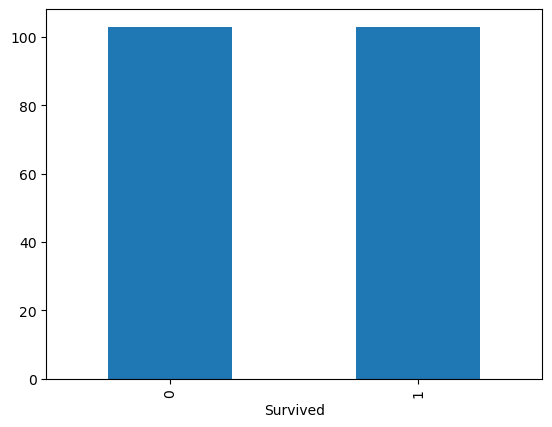

In [90]:
test_y3.value_counts().plot(kind='bar')

In [91]:
model3 = GaussianNB()

model3.fit(train_X3, train_y3);

In [92]:
print("Predicting iris on the test set")

y_pred3 = model3.predict(test_X3)

print("Accurary : ", round(accuracy_score(test_y3, y_pred3),4))
print(classification_report(test_y3, y_pred3))
print(confusion_matrix(test_y3, y_pred3))

Predicting iris on the test set
Accurary :  0.7767
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       103
           1       0.77      0.80      0.78       103

    accuracy                           0.78       206
   macro avg       0.78      0.78      0.78       206
weighted avg       0.78      0.78      0.78       206

[[78 25]
 [21 82]]


### ROC Curve

In [93]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(test_X)[:, 1]
y_pred2_prob = model2.predict_proba(test_X2)[:, 1]
y_pred3_prob = model3.predict_proba(test_X3)[:, 1]


In [94]:
fpr_grd_model, tpr_grd_model, _ = roc_curve(test_y, y_pred_prob)
fpr_grd_model2, tpr_grd_model2, _ = roc_curve(test_y2, y_pred2_prob)
fpr_grd_model3, tpr_grd_model3, _ = roc_curve(test_y3, y_pred3_prob)

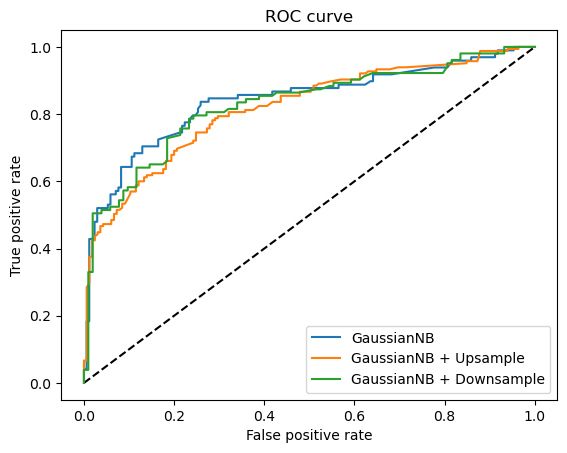

In [95]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_grd_model, tpr_grd_model, label='GaussianNB')
plt.plot(fpr_grd_model2, tpr_grd_model2, label='GaussianNB + Upsample')
plt.plot(fpr_grd_model3, tpr_grd_model3, label='GaussianNB + Downsample')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [96]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc1 = roc_auc_score(test_y, y_pred)
auc2 = roc_auc_score(test_y2, y_pred2)
auc3 = roc_auc_score(test_y3, y_pred3)

from IPython.display import HTML, display


display(HTML(
   '<table><tr><th>Algorithm</th><th>AUC</th></tr>'+
    '<tr><td>GaussianNB</td><td>'+
    str(round(auc1,6))+'</td></tr>'+
    '<tr><td>GaussianNB with Upsample</td><td>'+
    str(round(auc2,6))+'</td></tr>'+
    '<tr><td>GaussianNB with Downsample</td><td>'+
    str(round(auc3,6))+'</td></tr>'+'</table>')
)


Algorithm,AUC
GaussianNB,0.777371
GaussianNB with Upsample,0.745455
GaussianNB with Downsample,0.776699


### Precision, Recall, F1-Score, Support

In [97]:
from sklearn.metrics import precision_recall_fscore_support

##### Model 1 - GaussianNB 

In [98]:
print(precision_recall_fscore_support(test_y, y_pred, average='macro'))
print(precision_recall_fscore_support(test_y, y_pred, average='micro'))
print(precision_recall_fscore_support(test_y, y_pred, average='weighted'))

(0.7606169984772433, 0.7773709483793517, 0.7638357193418372, None)
(0.7723880597014925, 0.7723880597014925, 0.7723880597014926, None)
(0.7888675454154415, 0.7723880597014925, 0.7759096116142918, None)


##### Model 2 - GaussianNB with Upsample

In [99]:
print(precision_recall_fscore_support(test_y2, y_pred2, average='macro'))
print(precision_recall_fscore_support(test_y2, y_pred2, average='micro'))
print(precision_recall_fscore_support(test_y2, y_pred2, average='weighted'))

(0.7463594470046082, 0.7454545454545455, 0.745220588235294, None)
(0.7454545454545455, 0.7454545454545455, 0.7454545454545455, None)
(0.7463594470046082, 0.7454545454545455, 0.745220588235294, None)


##### Model 3 - GaussianNB with Downsample

In [100]:
print(precision_recall_fscore_support(test_y3, y_pred3, average='macro'))
print(precision_recall_fscore_support(test_y3, y_pred3, average='micro'))
print(precision_recall_fscore_support(test_y3, y_pred3, average='weighted'))

(0.7771169640328519, 0.7766990291262136, 0.7766148043375767, None)
(0.7766990291262136, 0.7766990291262136, 0.7766990291262136, None)
(0.7771169640328518, 0.7766990291262136, 0.7766148043375767, None)
